# **Reading data and basic stats**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("laptop3.csv")
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81


In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight_Kg', 'Price'],
      dtype='object')

In [ ]:
df.shape

(1273, 11)

# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight_Kg         1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 109.5+ KB


In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight_Kg,0


In [ ]:
df.duplicated().sum()

29

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52


In [ ]:
df["Inches"]=df["Inches"].str.replace("?","")

In [ ]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

In [ ]:
df["Inches"]=df["Inches"].astype("float")

In [ ]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [ ]:
df["Ram"]=df["Ram"].astype("int")

In [ ]:
df["Weight_Kg"]=df["Weight_Kg"].str.replace("?","")

In [ ]:
df['Weight_Kg'] = pd.to_numeric(df['Weight_Kg'], errors='coerce')

In [ ]:
df["Weight_Kg"]=df["Weight_Kg"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int64  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight_Kg         1243 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 116.6+ KB


# **Exploratory Data Analysis and Feature Engineering**

<Axes: xlabel='Price', ylabel='Density'>

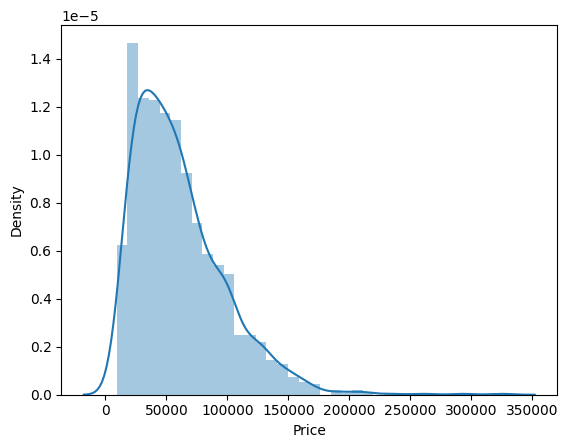

In [ ]:
sns.distplot(df["Price"])

<Axes: xlabel='Company'>

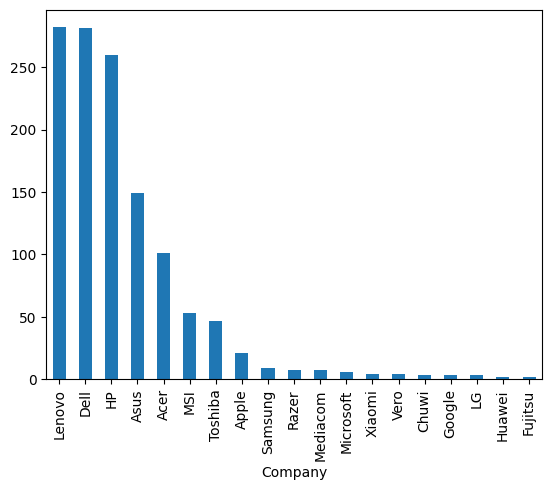

In [ ]:
df["Company"].value_counts().plot(kind="bar")

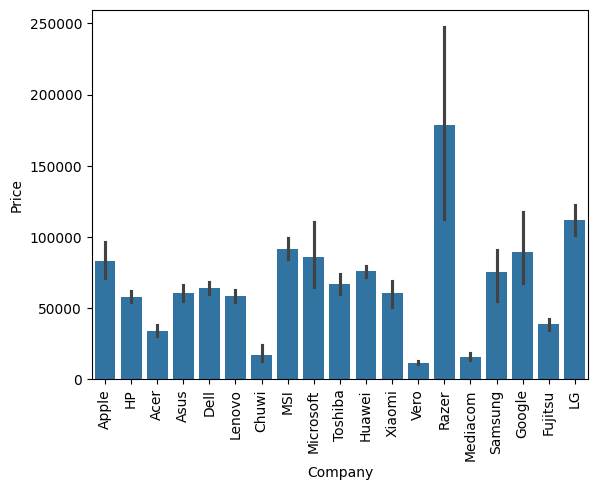

In [ ]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='TypeName'>

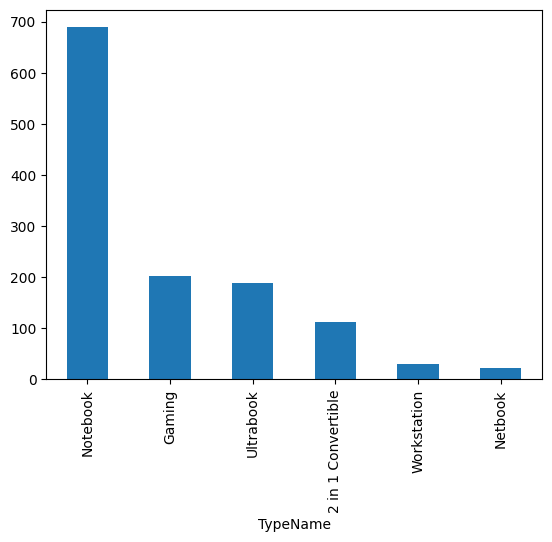

In [ ]:
df["TypeName"].value_counts().plot(kind="bar")

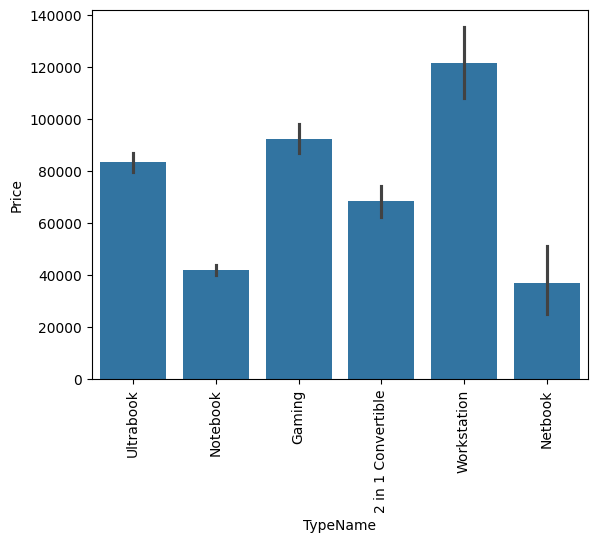

In [ ]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: ylabel='Density'>

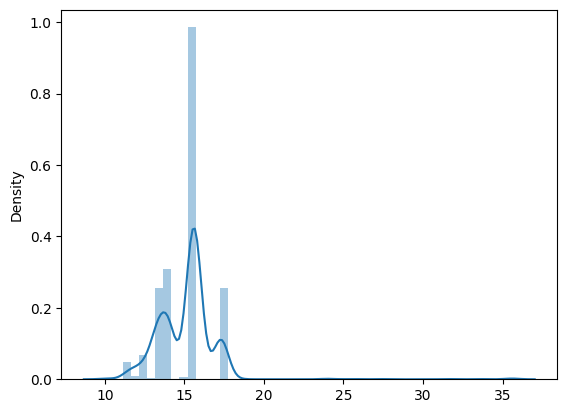

In [ ]:
sns.distplot(x=df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

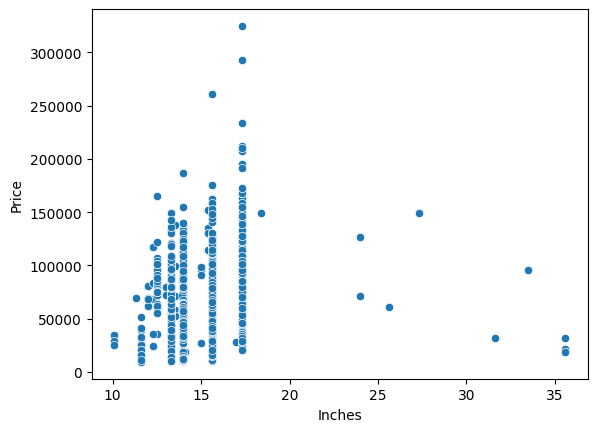

In [ ]:

sns.scatterplot(x="Inches",y="Price",data=df)

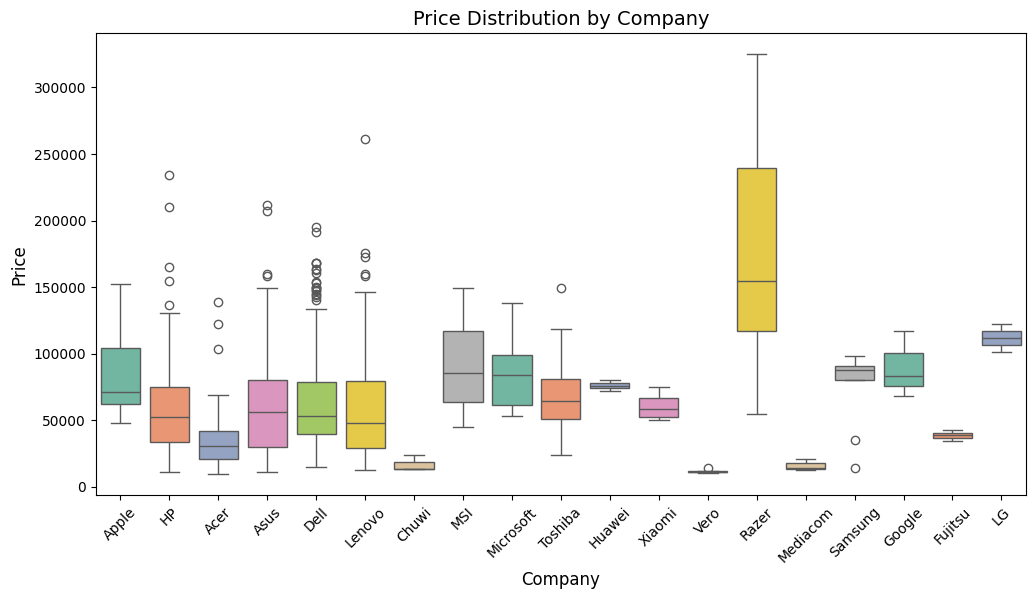

In [ ]:
# Boxplot for Price by Company
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Price', palette='Set2')
plt.title('Price Distribution by Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

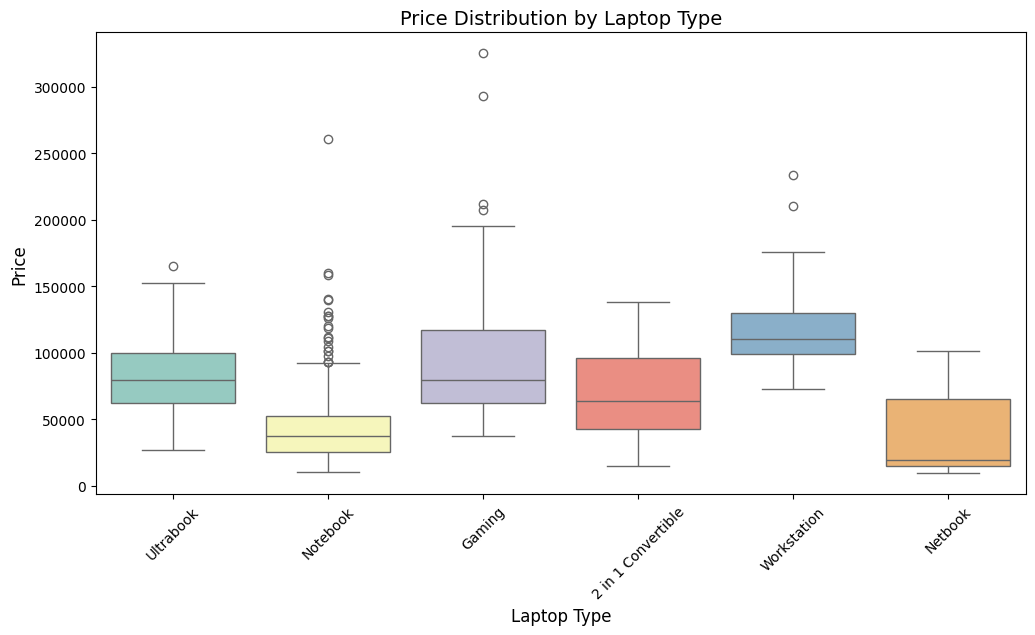

In [ ]:
# Boxplot for Price by TypeName
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TypeName', y='Price', palette='Set3')
plt.title('Price Distribution by Laptop Type', fontsize=14)
plt.xlabel('Laptop Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

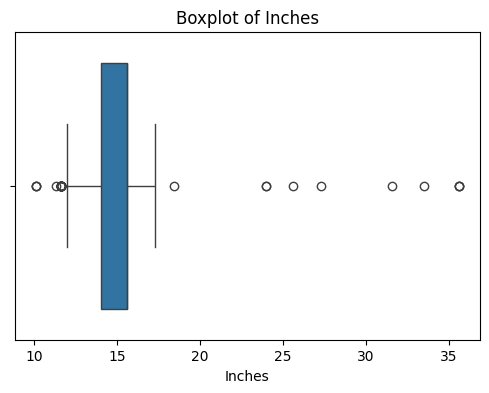

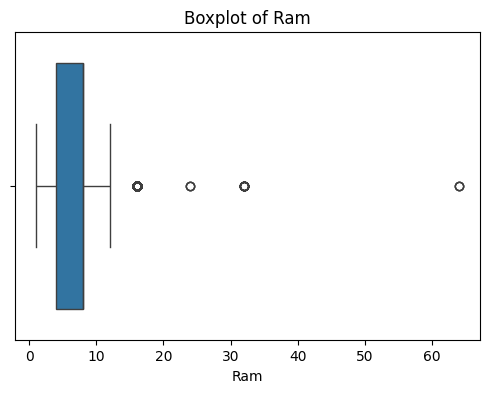

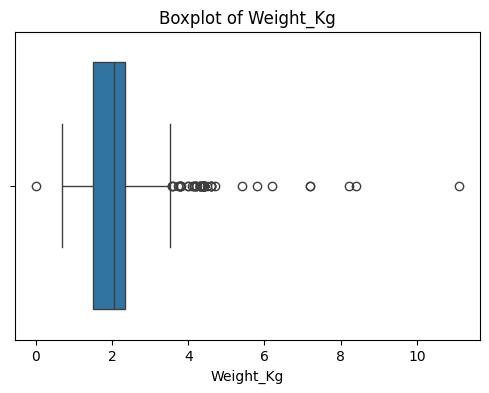

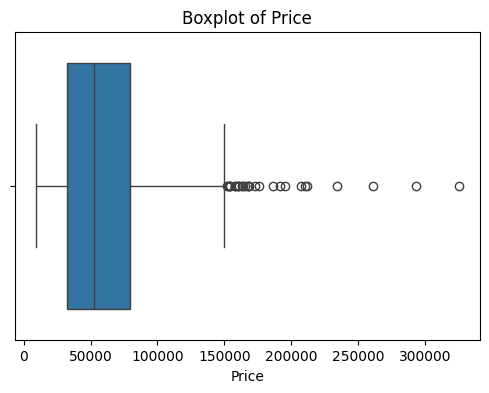

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Visualize outliers using boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



In [ ]:
# Calculate IQR for each numerical column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper bounds
for col in num_cols:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Confirm changes
print("Dataset after clipping outliers:")
print(df.describe())

Dataset after clipping outliers:
            Inches          Ram    Weight_Kg          Price
count  1243.000000  1244.000000  1243.000000    1244.000000
mean     15.053258     7.828778     2.031854   59796.600354
std       1.432916     3.426334     0.616835   34396.936695
min      11.600000     1.000000     0.255000    9270.720000
25%      14.000000     4.000000     1.500000   32655.445000
50%      15.600000     8.000000     2.040000   52693.920000
75%      15.600000     8.000000     2.330000   79813.440000
max      18.000000    14.000000     3.575000  150550.432500


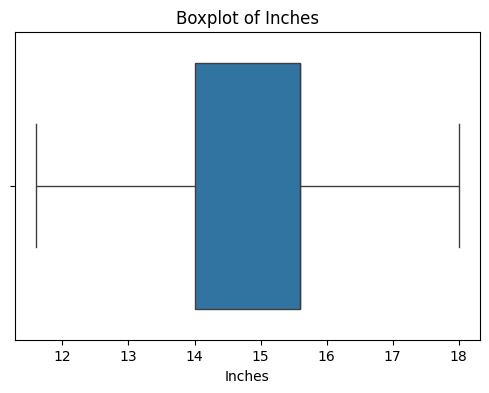

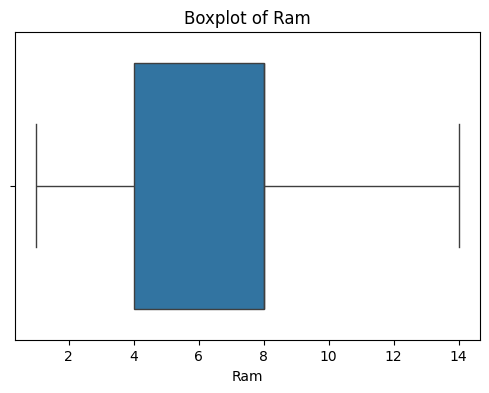

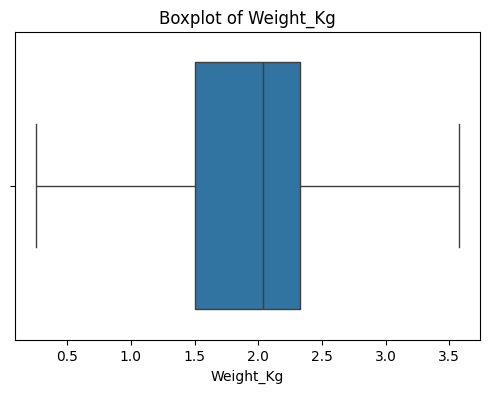

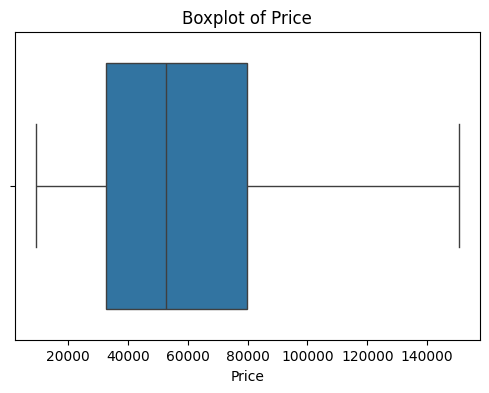

In [ ]:
# Visualize outliers using boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
df["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,493
1366x768,255
IPS Panel Full HD 1920x1080,222
IPS Panel Full HD / Touchscreen 1920x1080,50
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0


<Axes: xlabel='Touchscreen'>

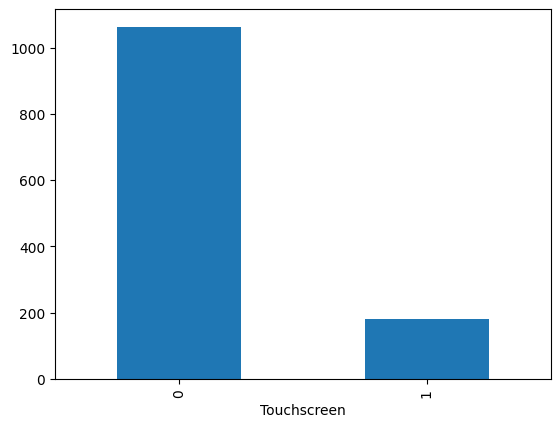

In [ ]:
df["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

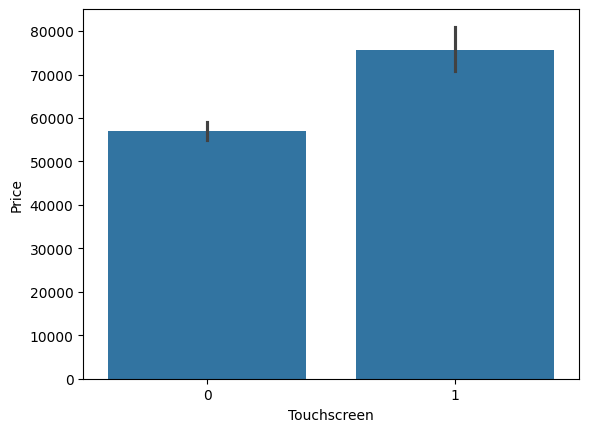

In [ ]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [ ]:
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1


<Axes: xlabel='Ips', ylabel='Price'>

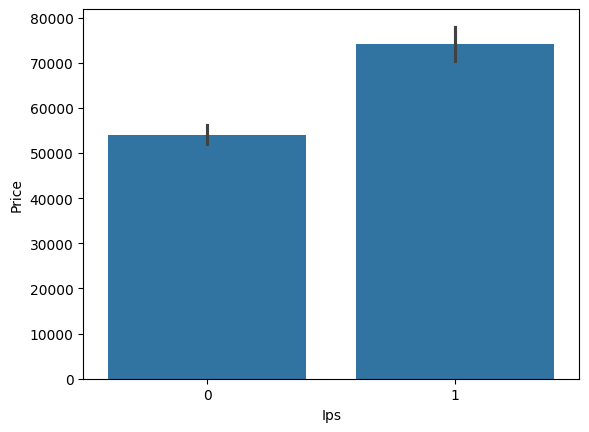

In [ ]:
sns.barplot(x=df["Ips"],y=df["Price"])

In [ ]:
 df["ScreenResolution"].str.split("x")

,ScreenResolution
0,"[IPS Panel Retina Display 2560, 1600]"
1,"[1440, 900]"
2,"[Full HD 1920, 1080]"
3,"[IPS Panel Retina Display 2880, 1800]"
4,"[IPS Panel Retina Display 2560, 1600]"
...,...
1239,"[1366, 768]"
1240,"[IPS Panel Full HD / Touchscreen 1920, 1080]"
1241,"[IPS Panel Quad HD+ / Touchscreen 3200, 1800]"
1242,"[1366, 768]"


In [ ]:
temp= df["ScreenResolution"].str.split("x",n=1,expand=True)

In [ ]:
df["X_res"]=temp[0]
df["Y_res"]=temp[1]

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,2560,1600


In [ ]:
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1243
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int64  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight_Kg         1243 non-null   float64
 10  Price             1244 non-null   float64
 11  Touchscreen       1244 non-null   int64  
 12  Ips               1244 non-null   int64  
 13  X_res             1244 non-null   int64  
 14  Y_res             1244 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 155.5+ KB


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the correlations with 'Price'
price_correlations = correlation_matrix['Price']

# Displaying the Result
print(price_correlations)

Inches         0.039182
Ram            0.735598
Weight_Kg      0.123678
Price          1.000000
Touchscreen    0.190539
Ips            0.263875
X_res          0.548901
Y_res          0.546457
Name: Price, dtype: float64


In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the correlations with 'Price'
price_correlations = correlation_matrix['Price']

# Displaying the Result
print(price_correlations)

Inches         0.039182
Ram            0.735598
Weight_Kg      0.123678
Price          1.000000
Touchscreen    0.190539
Ips            0.263875
X_res          0.548901
Y_res          0.546457
ppi            0.482695
Name: Price, dtype: float64


In [ ]:
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005


In [ ]:
df["Cpu"].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,126
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i5 6440HQ 2.6GHz,1
AMD A6-Series 7310 2GHz,1


In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

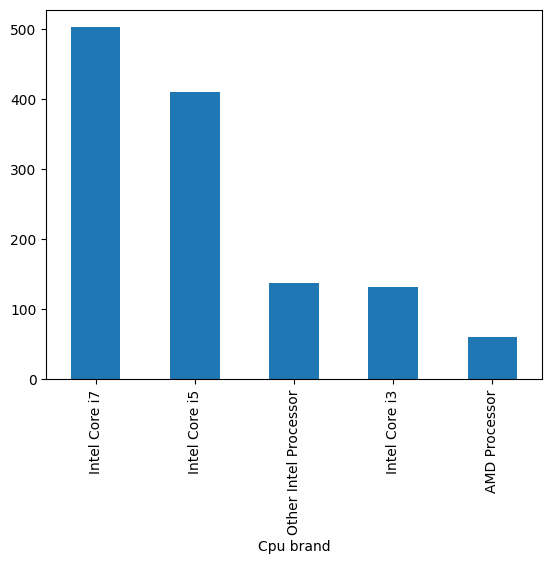

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

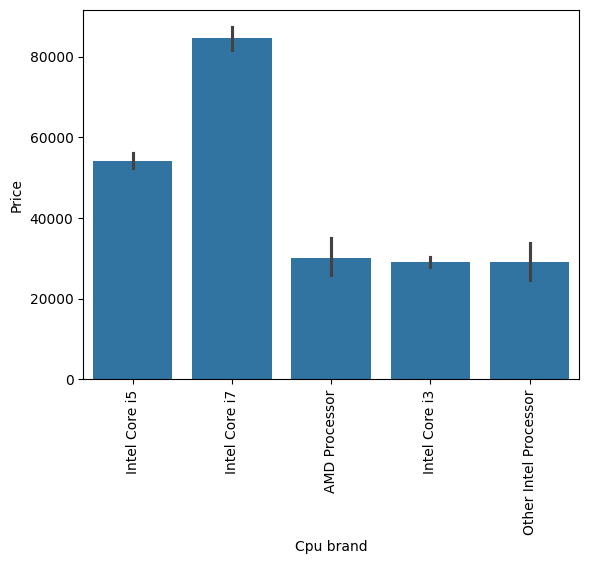

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


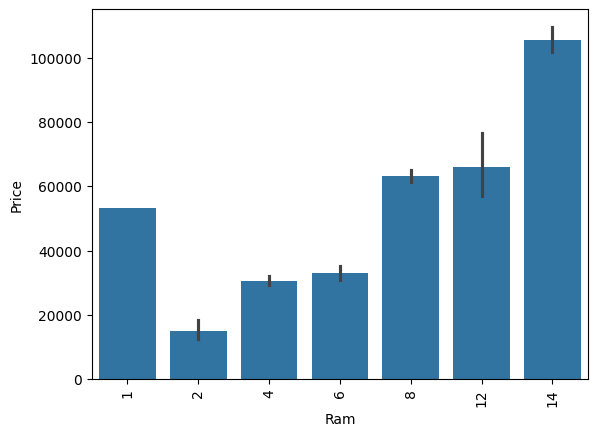

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already created the DataFrame 'df' from some source

# Debugging step: Check what columns are currently in the DataFrame
print("Columns in DataFrame:", df.columns)

# Only proceed if 'first' and 'second' are in the DataFrame
if 'first' in df.columns and 'second' in df.columns:
    # Process 'first' and 'second' columns
    df['first'] = df['first'].str.replace(r'\D', '', regex=True)
    df['first'].replace('', np.nan, inplace=True)  # Replace empty strings with NaN
    df['second'].fillna("0", inplace=True)  # Fill NaN in second with "0"

    # Convert to numeric, ensuring non-convertible entries become NaN
    df["first"] = pd.to_numeric(df["first"], errors='coerce').fillna(0).astype(int)
    df["second"] = pd.to_numeric(df["second"].str.replace(r'\D', '', regex=True), errors='coerce').fillna(0).astype(int)

    # Perform calculations
    df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
    df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
    df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
    df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])
else:
    print("Columns 'first' and/or 'second' are not present in the DataFrame.")

# Drop the unnecessary columns if they exist
columns_to_drop = ['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                   'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                   'Layer2Flash_Storage']

# Debugging step: Check if columns to drop exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
else:
    print("No columns to drop found in the DataFrame.")

Columns in DataFrame: Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight_Kg',
       'Price', 'Touchscreen', 'Ips', 'ppi', 'Cpu brand'],
      dtype='object')
Columns 'first' and/or 'second' are not present in the DataFrame.
No columns to drop found in the DataFrame.


In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the correlations with 'Price'
price_correlations = correlation_matrix['Price']

# Displaying the Result
print(price_correlations)

Ram            0.735598
Weight_Kg      0.123678
Price          1.000000
Touchscreen    0.190539
Ips            0.263875
ppi            0.482695
Name: Price, dtype: float64


In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,269
Intel HD Graphics 520,177
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,Intel


In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,684
Nvidia,389
AMD,170
ARM,1


In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,684
Nvidia,389
AMD,170


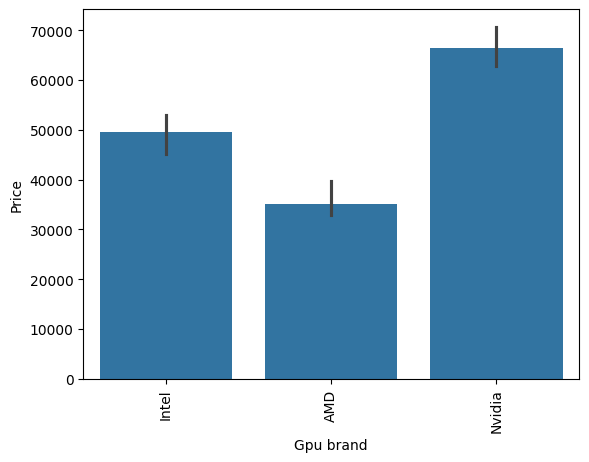

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,14,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,Intel


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1022
No OS,63
Linux,57
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


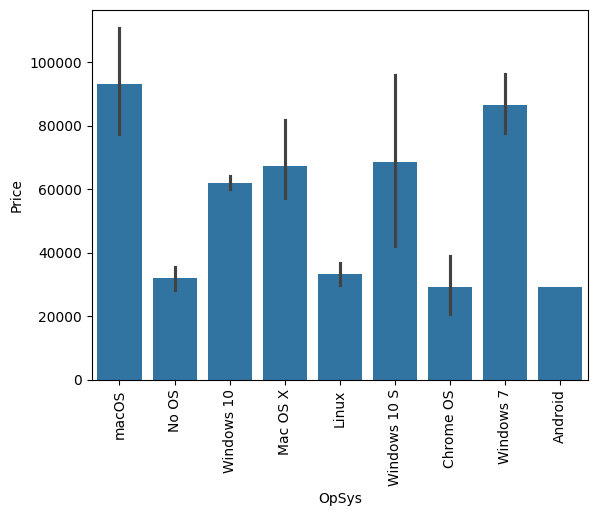

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

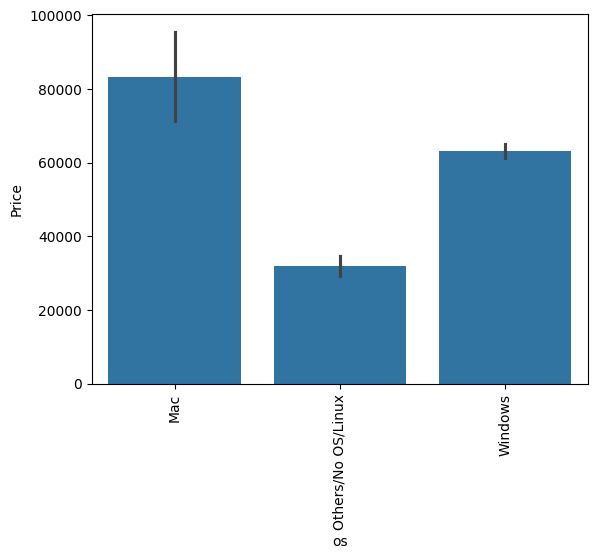

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.68,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.52,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,30636.00,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,135195.34,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.81,0,1,226.983005,Intel Core i5,Intel,Mac


<Axes: xlabel='Weight_Kg', ylabel='Density'>

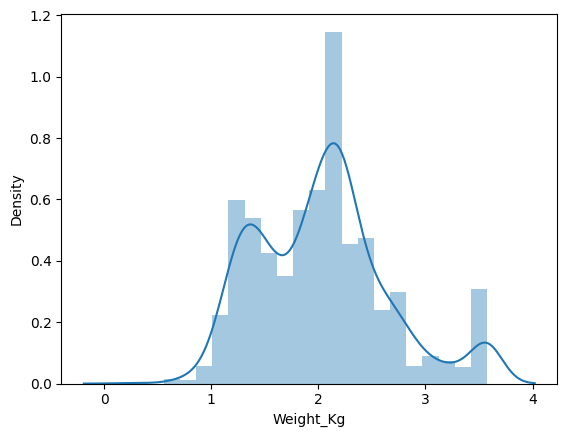

In [ ]:
sns.distplot(df['Weight_Kg'])

<Axes: xlabel='Weight_Kg', ylabel='Price'>

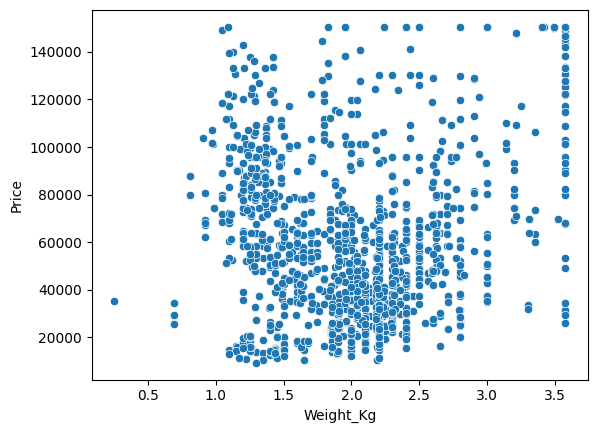

In [ ]:
sns.scatterplot(x=df['Weight_Kg'],y=df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1243 non-null   object 
 1   TypeName     1243 non-null   object 
 2   Ram          1243 non-null   int64  
 3   Weight_Kg    1242 non-null   float64
 4   Price        1243 non-null   float64
 5   Touchscreen  1243 non-null   int64  
 6   Ips          1243 non-null   int64  
 7   ppi          1242 non-null   float64
 8   Cpu brand    1243 non-null   object 
 9   Gpu brand    1243 non-null   object 
 10  os           1243 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 116.5+ KB


<Axes: xlabel='Price', ylabel='Density'>

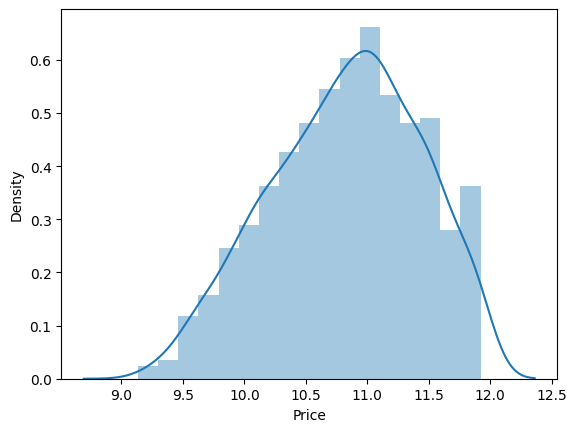

In [ ]:
sns.distplot(np.log(df['Price']))

# **Model Selection**

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight_Kg,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...
1239,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,Nvidia,Windows
1240,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,Intel,Windows
1241,Lenovo,2 in 1 Convertible,14,1.30,1,1,276.053530,Intel Core i7,Intel,Windows
1242,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,Intel,Windows


In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1239,10.555257
1240,10.433899
1241,11.288115
1242,9.409283


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# **Linear regression**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error

# Identify your numeric and categorical columns
numeric_features = [x for x in X_train.columns if X_train[x].dtype in ['int64', 'float64']]
categorical_features = [x for x in X_train.columns if X_train[x].dtype == 'object']

# Create transformers for both numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute numeric features
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical features
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'))  # One-hot encode
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Initialize the Lasso model
step2 = Lasso(alpha=0.001)

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', step2)
])

# Fit the model
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print(f'R2 score {r2_score(y_test, y_pred)}')
print(f'MAE {mean_absolute_error(y_test, y_pred)}')

R2 score 0.7370467400652436
MAE 0.23817387613648647


# **Decision Tree**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7256609846445579
MAE 0.23878945151309044


# **Random Forest**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8263688114724712
MAE 0.19447869015537805


# **Exporting the Model**

In [ ]:
import pickle

pickle.dump(df,open('df_laptop.pkl','wb'))
pickle.dump(pipe,open('pipe_laptop.pkl','wb'))

In [ ]:
df.head()

,Company,TypeName,Ram,Weight_Kg,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.68,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.52,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,30636.00,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,135195.34,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.81,0,1,226.983005,Intel Core i5,Intel,Mac


In [ ]:
X_train.head()

,Company,TypeName,Ram,Weight_Kg,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
913,MSI,Gaming,8,2.20,0,0,141.211998,Intel Core i7,Nvidia,Windows
809,Lenovo,Ultrabook,14,1.10,0,1,209.800683,Intel Core i7,Intel,Windows
601,Dell,Notebook,4,1.93,0,0,100.454670,Intel Core i5,Intel,Others/No OS/Linux
1028,HP,Notebook,4,2.31,0,0,100.454670,Intel Core i3,Intel,Windows
1214,Dell,2 in 1 Convertible,14,2.77,1,0,127.335675,Intel Core i7,Nvidia,Windows
